# Business Understanding

## Project Domain
Domain: Milk Quality Prediction by leveraging the benefits of machine learning in the dairy industry

Proyek prediksi kualitas susu menggunakan machine learning berada dalam domain pertanian dan peternakan, ilmu pangan, data science, kualitas dan keamanan pangan, teknologi pertanian (AgriTech), serta sistem informasi manajemen, dengan tujuan meningkatkan efisiensi dan kualitas produksi susu.

## Problem Statements

Industri susu menghadapi tantangan dalam memastikan konsistensi kualitas susu, yang sangat penting untuk keamanan dan kepuasan konsumen. Variasi dalam kualitas susu dapat muncul dari beberapa faktor, termasuk tingkat pH, suhu, rasa, aroma, kandungan lemak, kekeruhan, dan warna.Metode tradisional untuk menilai kualitas susu sering kali memakan waktu dan bersifat subjektif, yang dapat mengarah pada potensi ketidakakuratan.

## Goals

Variabel target adalah Kualitas susu. Ini dapat berupa:

Target
* Rendah (Buruk)
* Sedang (Sedang)
* Tinggi (Baik)

Jika Rasa, Aroma, Lemak, dan Kekeruhan memenuhi kondisi optimal, maka mereka akan diberi nilai 1, jika tidak, 0. Suhu dan pH diberikan nilai aktualnya dalam dataset. Melakukan preprocessing data dan teknik augmentasi data untuk membangun model statistik dan prediktif untuk memprediksi kualitas susu.

## Solution Statements



*  Machine Learning Model Menggunakan Artificial Neural Network (ANN) untuk klasifikasi susu berdasarkan dataset parameter tanah dan iklim. Model dilatih untuk memprediksi susu dengan akurasi tinggi (>90%).

* Aplikasi Web (Streamlit) Membuat antarmuka yang mudah digunakan bagi industri untuk memasukkan parameter Rendah (Buruk), Sedang (Sedang), Tinggi (Baik) untuk mendapatkan kualitas yang baik

* Optimasi dengan TensorFlow Lite Model dikonversi ke format TFLite agar ringan dan bisa dijalankan di perangkat dengan sumber daya terbatas.




# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d cpluzshrijayan/milkquality

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!mkdir milkquality
!unzip milkquality.zip -d milkquality
!ls milkquality

unzip:  cannot find or open milkquality.zip, milkquality.zip.zip or milkquality.zip.ZIP.


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score


# Exploratory Data Analysis

In [ ]:
data = pd.read_csv('/content/milkquality/milknew.csv')
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


<ipython-input-33-26bb20d228e9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_17, x='index', y='Grade', inner='stick', palette='Dark2')


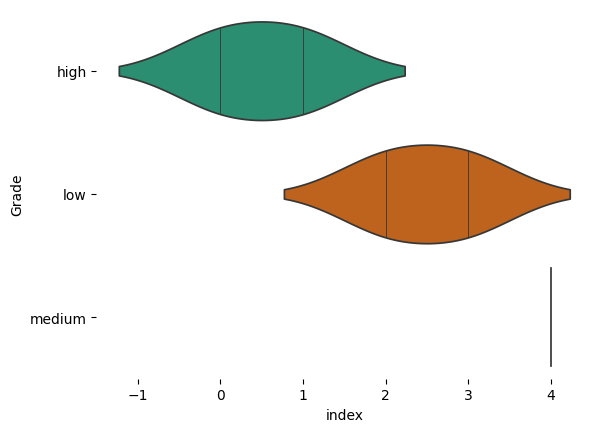

In [ ]:
sns.violinplot(_df_17, x='index', y='Grade', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

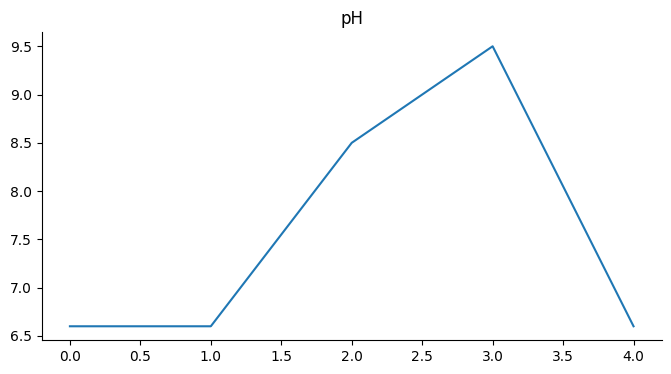

In [ ]:
_df_14['pH'].plot(kind='line', figsize=(8, 4), title='pH')
plt.gca().spines[['top', 'right']].set_visible(False)

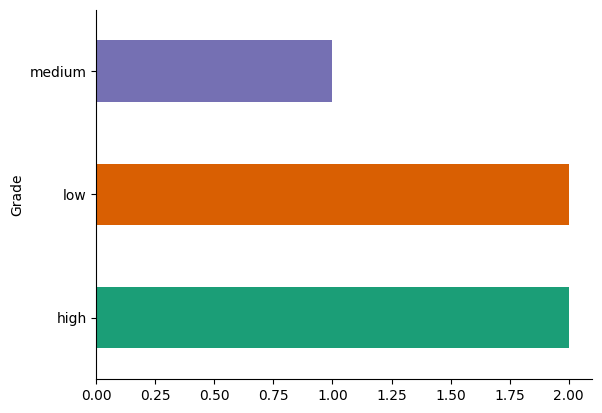

In [ ]:
_df_4.groupby('Grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

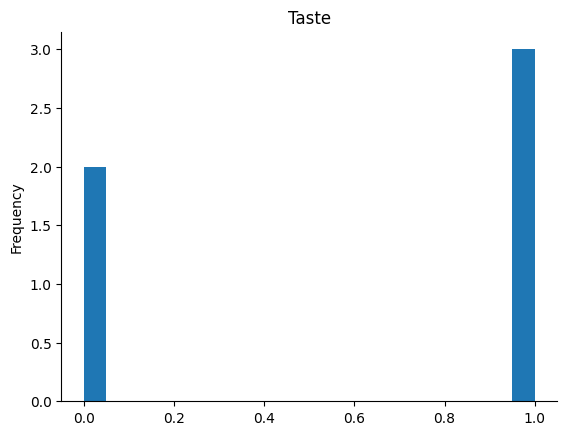

In [ ]:
_df_3['Taste'].plot(kind='hist', bins=20, title='Taste')
plt.gca().spines[['top', 'right',]].set_visible(False)

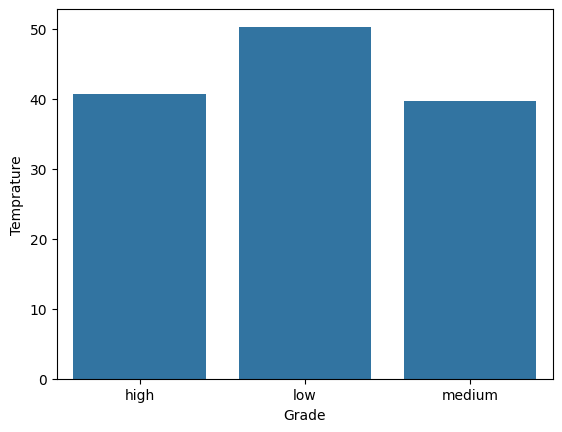

In [ ]:
sns.barplot(x='Grade', y='Temprature', data=data, estimator=np.mean, errorbar=None)
plt.xlabel("Grade")
plt.ylabel("Temprature")
plt.show()

# Data Preparation

In [ ]:
# pisahkan fitur (X) dan target (y)
X = data.drop("Turbidity", axis=1)
y = data["Turbidity"]

In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Grade' column in X
X['Grade'] = label_encoder.fit_transform(X['Grade'])

In [ ]:
# split databet menjadi traiing dan tezting set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [ ]:
# membangun model ANN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,413 (36.77 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,276 (24.52 KB)

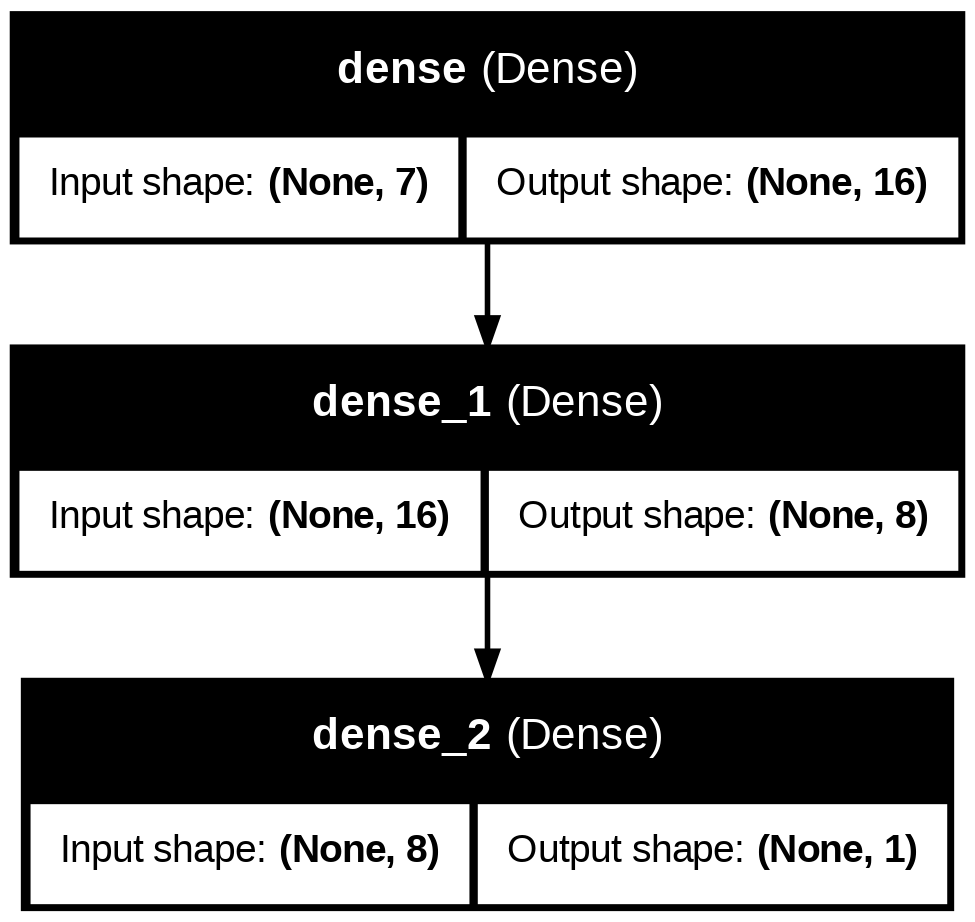

In [ ]:
# plot arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5175 - loss: 0.7747 - val_accuracy: 0.5235 - val_loss: 0.6929
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5683 - loss: 0.6806 - val_accuracy: 0.6882 - val_loss: 0.6247
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6251 - loss: 0.6189 - val_accuracy: 0.7588 - val_loss: 0.5739
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8073 - loss: 0.5718 - val_accuracy: 0.8353 - val_loss: 0.5240
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.5240 - val_accuracy: 0.8471 - val_loss: 0.4780
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8341 - loss: 0.4931 - val_accuracy: 0.8529 - val_loss: 0.4414
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8352 - loss: 0.4530 - val_accuracy: 0.8529 - val_loss: 0.4111
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8406 - loss: 0.4173 - val_accuracy: 0.8529 - val_loss:

# Evaluation

In [ ]:
# prediksi kpada data test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
# menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

Akurasi: 95.28%


In [ ]:
print ("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix: 
[[109   4]
 [  6  93]]


In [ ]:
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       113
           1       0.96      0.94      0.95        99

    accuracy                           0.95       212
   macro avg       0.95      0.95      0.95       212
weighted avg       0.95      0.95      0.95       212



In [ ]:
# contoh input data baru
new_data = np.array([[7.5, 45, 1, 0, 1, 0, 254]]) # contoh susu

# normalisasi input data baru
new_data_scaled = scaler.transform(new_data)

## prediksi
prediction_prob = model.predict(new_data_scaled)
prediction = (prediction_prob > 0.5).astype(int)

# Define class labels
class_labels = ['low', 'medium', 'high']  # Replace with your actual class labels

# Get predicted grade
predicted_grade = class_labels[prediction[0][0]]

# Print the predicted grade
print(f"Predicted Grade: {predicted_grade}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted Grade: low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.save("diabetes_model.h5")

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [ ]:
# membangun model ANN Optimasi
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
Dropout(0.3)
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
Dropout(0.3)
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# COMPILE model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

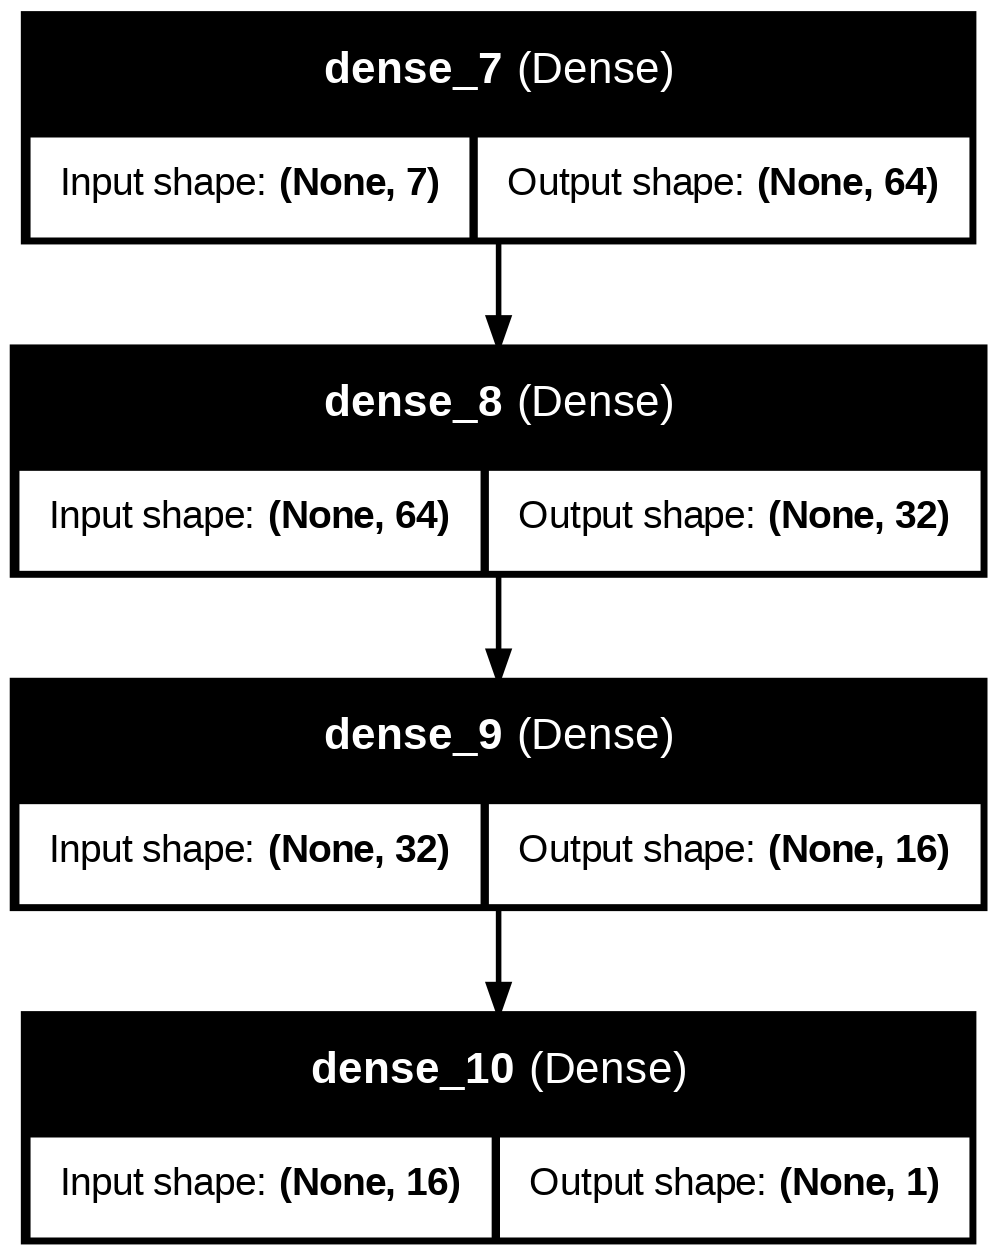

In [ ]:
# plot arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# melatih model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    # callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6213 - loss: 1.3938 - val_accuracy: 0.7765 - val_loss: 1.1544
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8038 - loss: 1.0978 - val_accuracy: 0.8353 - val_loss: 0.9301
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8684 - loss: 0.8884 - val_accuracy: 0.8706 - val_loss: 0.7763
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8604 - loss: 0.7567 - val_accuracy: 0.8706 - val_loss: 0.6659
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.6388 - val_accuracy: 0.8765 - val_loss: 0.5996
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.5687 - val_accuracy: 0.8765 - val_loss: 0.5398
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9011 - loss: 0.5091 - val_accuracy: 0.9118 - val_loss: 0.4938
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8947 - loss: 0.4762 - val_accuracy: 0.9000 - v

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


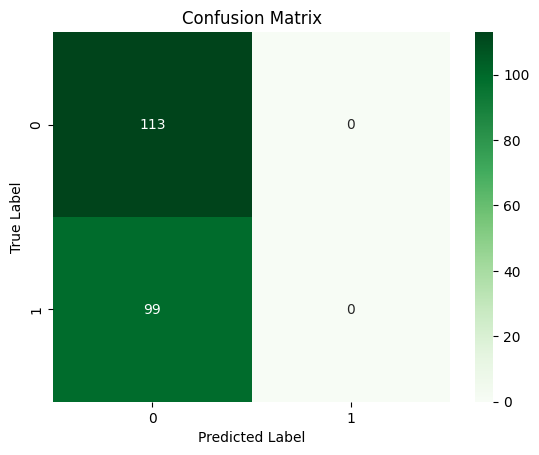

Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       113
           1       0.00      0.00      0.00        99

    accuracy                           0.53       212
   macro avg       0.27      0.50      0.35       212
weighted avg       0.28      0.53      0.37       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


# Deployment

## Model Simulation

In [ ]:
sample_input = np.array([[6.6, 34, 0, 1, 0, 1, 245]])
sample_input_df = pd.DataFrame(sample_input)

In [ ]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = label_encoder.inverse_transform([predicted_class])

print(f"Kualitas Susu: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Kualitas Susu: high


## Save Model

In [ ]:

# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('milk_predict.tflite', 'wb') as f:
    f.write(tflite_model)

files.download('milk_predict.tflite')

Saved artifact at '/tmp/tmpbejca8p2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138287797407952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797408912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797409488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797412944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797409680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797414096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797409872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138287797408144: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']